Importing the dataset about population, quantity of livebirths and deaths, life expactancy by Ukrainian regions in 2020

In [102]:
import pandas as pd


df = pd.read_excel("C:/Users/user/Documents/Ukraine.xlsx", 
                   header=  0,  
                   usecols = "A:E", 
                   index_col=0, 
                   names = ["Region", "Population", "Livebirth", "Deaths","LifeExpect"])

print(df)

                  Population  Livebirth  Deaths  LifeExpect
Region                                                     
Vinnytska            1545416      11486   25379       72.24
Volynska             1031421      10448   14344       71.29
Dnipropetrovska      3176648      21309   55290       70.17
Donetska             4131808      11036   37131       70.00
Zhytomyrska          1208212       9151   21212       69.72
Zakarpatska          1253791      13503   16756       70.47
Zaporizka            1687401      10523   29388       70.83
Іvano-Frankivska     1368097      11793   19177       72.83
Kyjivska             1781044      14205   31481       69.72
Kirovogradska         933109       6048   16624       70.11
Luganska             2135913       4013   15113       70.00
Lvivska              2512084      21129   36327       72.42
Mykolajivska         1119862       7633   17765       71.04
Odeska               2377230      20555   34809       71.31
Poltavska            1386978       8629 

Question 1: Which region has the largest population?

In [22]:
def answer_one():
    return df[df['Population'] == max(df['Population'])].index[0]
answer_one()

'Donetska'

Question 2: Which region has the biggest natural decrease in Population?

In [26]:
def answer_two():
    df['dec'] = abs(df['Livebirth']-df['Deaths'])
    return df[df['dec'] == max(df['dec'])].index[0]
answer_two()

'Dnipropetrovska'

Question 3: Which region has the highest birth rate?

In [27]:
def answer_three():
    df['rate'] = abs(df['Livebirth']/df['Population']*1000)
    return df[df['rate'] == max(df['rate'])].index[0]
answer_three()

'Zakarpatska'

Question 4: What is the mean life expectancy in Ukraine?

In [53]:
df['Count']=df['Population']*df['LifeExpect']
df.head()
df['Count'].sum()/df['Population'].sum()

70.9839751012558

Question 5: Which region has the highest death rate and what is its value?

In [57]:
def answer_five():
    
    df['deathrate'] = abs(df['Deaths']/df['Population']*1000)
    death = df['deathrate']
    ans = death.idxmax()
    return (ans, death[ans])
 
answer_five()

('Chernigivska', 19.690424838645246)

Question 6: Creation of horizontal bar of population by regions.

<AxesSubplot:title={'center':'Ukrainian population by Regions in 2020, mio'}, ylabel='Region'>

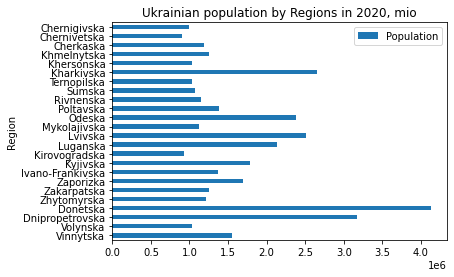

In [103]:
import matplotlib.pyplot as plot

new=df

del new['Livebirth']
del new['Deaths']
del new['LifeExpect']

dframe=pd.DataFrame(data=new)
df.plot.barh(title="Ukrainian population by Regions in 2020, mio")
